# Inclass 3
Group Members: Recep Akpunar, Emirhan Şahinoğlu, Oğuzhan Alasulu

In [33]:
import time
import tensorflow as tf
from keras.datasets import mnist
import matplotlib.pyplot as plt
import numpy as np
from tensorflow import keras
from keras import layers
from keras.utils import to_categorical
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.preprocessing import StandardScaler


Shape of train_images: (60000, 28, 28)
Number of elements in train_labels: 60000
Values of train_labels: [5 0 4 ... 5 6 8]


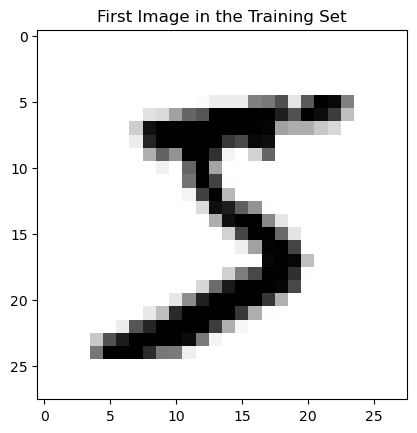

Label of the first image in the training set: 5
Shape of test images: (10000, 28, 28)
Number of elements in test labels: 10000
Values of test labels: [7 2 1 ... 4 5 6]
Label of the first image in the test set: 7


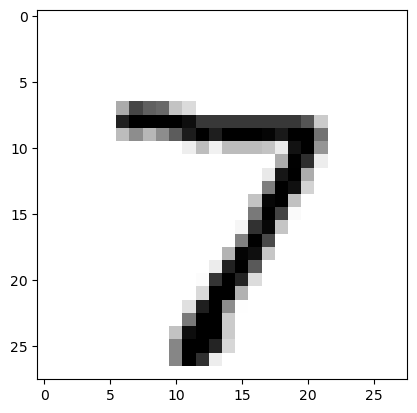

In [34]:
###--- Load the MNIST dataset using Keras ---###      
# Load the Dataset and Data Splitting
(train_images, train_labels), (test_images, test_labels) = mnist.load_data("mnist.npz")
# Print the shape of train_images
print("Shape of train_images:", train_images.shape)
# Print the number of elements in train_labels
print("Number of elements in train_labels:", len(train_labels))
# Print the values of train_labels
print("Values of train_labels:", train_labels)
# Plot the first image in the training set
plt.imshow(train_images[0], cmap=plt.cm.binary)
plt.title("First Image in the Training Set")
plt.show()
# Print the label (class) of the first image in the training set
print("Label of the first image in the training set:", train_labels[0])
# Check the size of the test data
print("Shape of test images:", test_images.shape)
print("Number of elements in test labels:", len(test_labels))
print("Values of test labels:", test_labels)
# Plot the first image in the test set
plt.imshow(test_images[0], cmap=plt.cm.binary)
print("Label of the first image in the test set:",test_labels[0])

In [35]:
print("(\__/)")
print("(='.'=)")
print("('')_('')")


(\__/)
(='.'=)
('')_('')


In [36]:
# Normalize pixel values to be between 0 and 1
train_images = train_images.astype('float32') / 255.0
test_images = test_images.astype('float32') / 255.0
# Flatten the images
train_images_flat = train_images.reshape((train_images.shape[0], -1))
test_images_flat = test_images.reshape((test_images.shape[0], -1))
# Convert labels to one-hot encoding
train_labels_categorical = to_categorical(train_labels)
test_labels_categorical = to_categorical(test_labels)
# Print the shapes of the preprocessed data
print("Shape of train_images_flat:", train_images_flat.shape)
print("Shape of test_images_flat:", test_images_flat.shape)
print("Shape of train_labels_categorical:", train_labels_categorical.shape)
print("Shape of test_labels_categorical:", test_labels_categorical.shape)

Shape of train_images_flat: (60000, 784)
Shape of test_images_flat: (10000, 784)
Shape of train_labels_categorical: (60000, 10)
Shape of test_labels_categorical: (10000, 10)


In [37]:
print("(\__/)")
print("(='.'=)")
print("('')_('')")

(\__/)
(='.'=)
('')_('')


In [38]:
###--- Classifier Implementation  ---###
# Logistic Regression
scaler = StandardScaler()
train_images_scaled = scaler.fit_transform(train_images_flat)
test_images_scaled = scaler.transform(test_images_flat)
start_time = time.time()
logistic_reg_model_scaled = LogisticRegression(max_iter=1000)
logistic_reg_model_scaled.fit(train_images_scaled, train_labels) # Use scaled data here
end_time = time.time()
training_time = end_time - start_time
predictions = logistic_reg_model_scaled.predict(test_images_scaled) # Use scaled data here
print("Training Time for Logistic Regression Classifier:", training_time)
print("Parameters used:", logistic_reg_model_scaled.get_params())
# k-Nearest Neighbors (k-NN)
start_time = time.time()
knn_classifier = KNeighborsClassifier(n_neighbors=3)
knn_classifier.fit(train_images_flat, train_labels)
end_time = time.time()
training_time = end_time - start_time
predictions = knn_classifier.predict(test_images_flat)
print("Training Time for k-NN classifier:", training_time)
print("Parameters used:", knn_classifier.get_params())
# Decision Trees
start_time = time.time()
dt_classifier = DecisionTreeClassifier()
dt_classifier.fit(train_images_flat, train_labels)
end_time = time.time()
training_time = end_time - start_time
predictions = dt_classifier.predict(test_images_flat)
print("Training Time for Decision Tree Classifier:", training_time)
print("Parameters used:", dt_classifier.get_params())

Training Time for Logistic Regression Classifier: 73.40692162513733
Parameters used: {'C': 1.0, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 1000, 'multi_class': 'auto', 'n_jobs': None, 'penalty': 'l2', 'random_state': None, 'solver': 'lbfgs', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}
Training Time for k-NN classifier: 0.05385637283325195
Parameters used: {'algorithm': 'auto', 'leaf_size': 30, 'metric': 'minkowski', 'metric_params': None, 'n_jobs': None, 'n_neighbors': 3, 'p': 2, 'weights': 'uniform'}
Training Time for Decision Tree Classifier: 21.875903367996216
Parameters used: {'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'random_state': None, 'splitter': 'best'}


In [39]:
print("(\__/)")
print("(='.'=)")
print("('')_('')")

(\__/)
(='.'=)
('')_('')


In [42]:
# Classifier Evaluation Function
def evaluate_classifier(classifier, test_data, test_labels):
    predictions = classifier.predict(test_data)
    accuracy = accuracy_score(test_labels, predictions)
    precision = precision_score(test_labels, predictions, average='weighted')
    recall = recall_score(test_labels, predictions, average='weighted')
    f1 = f1_score(test_labels, predictions, average='weighted')
    return accuracy, precision, recall, f1

In [43]:
def plot_confusion_matrix(cm, labels):
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.title('Confusion Matrix')
    plt.show()

__Neural Netwrok__

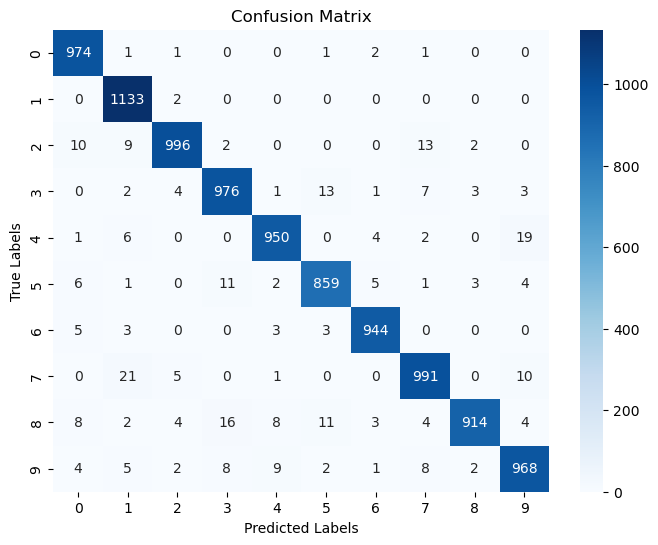


k-NN Classifier:
Accuracy: 0.9705
Precision: 0.9706882342922246
Recall: 0.9705
F1 Score: 0.9704523390961245


In [44]:
# Compute confusion matrix for k-NN Classifier
knn_cm = confusion_matrix(test_labels, knn_classifier.predict(test_images_flat))
plot_confusion_matrix(knn_cm, labels=np.unique(test_labels))
# Evaluate k-NN Classifier
knn_accuracy, knn_precision, knn_recall, knn_f1 = evaluate_classifier(knn_classifier, test_images_flat, test_labels)
print("\nk-NN Classifier:")
print("Accuracy:", knn_accuracy)
print("Precision:", knn_precision)
print("Recall:", knn_recall)
print("F1 Score:", knn_f1)

Neural Network

First of all, we trained and classified the model using neural network, which is a method that is widely used in machine learning and can serve many purposes. Neural Network can have 1 layer or multiple layers, but the number of layers should be adjusted according to the purpose of the model. Otherwise, unwanted results may be obtained. There are layers called hidden layers. The model takes the human drawing and tries to classify it. Classification is done by the hidden layer. Finally, after determining which number is the input, it outputs to the output layer and the model is completed. The definitions of Accuracy, Precision, Recall and F1 score parameters that indicate the performance of the model are as follows. 

Accuracy: It indicates how accurate the classification operations performed by the model. The mathematical formula is Accuracy = (Number of Correct Predictions) / (Total Number of Samples). The closer the Accuracy value is to 1, the better the model works, or the closer it is to 0, the more errors in the classification of the model. 

Precision : It indicates the accuracy of the positive predictions made by the model. Mathematically, its formula is Precision = (Number of Correct Positive Predictions) / (Total Number of Positive Predictions). The closer the Precision value is to 1, the better the positive predictions of the model or the closer to 0, the more errors in the positive predictions of the model.

Recall : There are both positive and negative samples in the model and this parameter shows how accurately the positive samples are classified. The mathematical formula is Recall = (Number of Correct Positive Predictions) / (Total Number of True Positive Samples). The closer the Recall value is to 1, the better the model works, i.e. their classification is correct, or the closer it is to 0, it means that there are errors in the classification of the model.

F1 score : It shows the harmonic mean value between Precision and Recall values. The mathematical formula is F1 Score = 2* (Precision * Recall) / (Precision + Recall). In other words, we can say that it indicates the balance between recall and precision parameters. As in this task, the F1 score value is a very important parameter in tasks that require classification. 

As it is understood both in the lecture and in this task, the accuracy of the model increases as the number of hidden layers increases, but the value of this parameter should be chosen carefully. The excessive increase in the number of hidden layers will lead to a decrease in the accuracy of the model and the time taken while training the model will be more. 
As can be seen above, the confusion matrix table of the model is drawn. In this matrix table, the values in the blue boxes on the diagonal indicate True Positive conditions. When we examined the results, we observed that the model works correctly and with a small margin of error.

The num_epochs value in our code indicates the iteration amount of the model. In other words, it shows how many times the model will be trained with the training data. This value in our code is 100. As a result of the experiments, it has been observed that decreasing the num_epochs value decreases the training time and therefore the model runs faster, the model's performance on the test and the critical overlearning situation decreases. On the other hand, it has been observed that the increase in the number of num_epochs is more time in the training of the model and therefore it runs slower, the accuracy parameters of the model on the test increase and more accurate results are obtained and the overlearning situation increases. Due to these effects, it is important to choose the num_epochs value carefully. The solution is to start from a low value and monitor the performance of the model and increase the value accordingly.

__Logistic Regression Classifier__

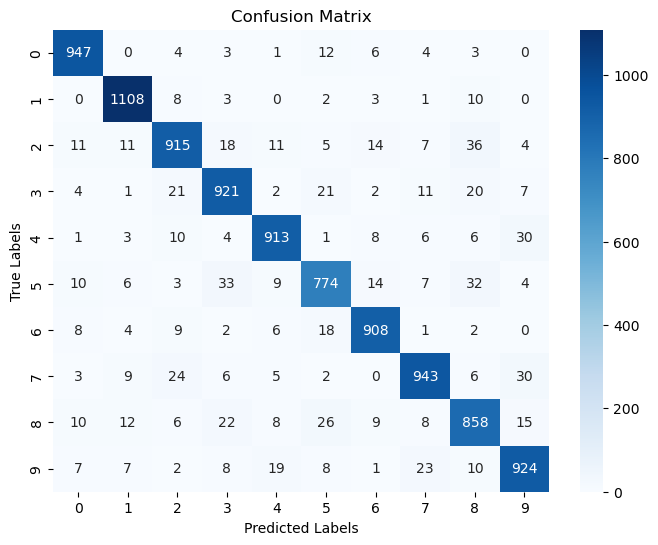

Logistic Regression Classifier with scaled data:
Accuracy: 0.9211
Precision: 0.9209528453621644
Recall: 0.9211
F1 Score: 0.9209543264763


In [45]:
logistic_reg_cm_scaled = confusion_matrix(test_labels, logistic_reg_model_scaled.predict(test_images_scaled))
plot_confusion_matrix(logistic_reg_cm_scaled, labels=np.unique(test_labels))
# Evaluate Logistic Regression Classifier
logistic_reg_accuracy_scaled, logistic_reg_precision_scaled, logistic_reg_recall_scaled, logistic_reg_f1_scaled = evaluate_classifier(logistic_reg_model_scaled, test_images_scaled, test_labels)
print("Logistic Regression Classifier with scaled data:")
print("Accuracy:", logistic_reg_accuracy_scaled)
print("Precision:", logistic_reg_precision_scaled)
print("Recall:", logistic_reg_recall_scaled)
print("F1 Score:", logistic_reg_f1_scaled)

Logistic regression trains the model components (coefficients) in order to minimise the logistic loss function. This process is completed by regularly updating the parameters by gradient descent or similar algorithms when the maximum iteration value is reached or until convergence. 
The maximum number of iterations plays an important role in logistic regression. 
Adjustments are made to the model by changing the parameters. For example, when we increase the maximum iteration value, the accuracy of the model increases. On the contrary, when we try to decrease the value, the accuracy of the model decreases.  Considering the observations obtained as a result of these experiments, it can be said that the model success decreases with the decrease in the number of iterations, which is a major factor for logistic regression. Otherwise, we can train the model faster with a lower iteration number. Also, as a result of the observations made, it can be said that increasing the maximum iteration number does not affect the success of the model much at other values after reaching a certain value. This increase only increases the training level. 
The effective side of the classifier is that the logistic regression is still efficient and open to interpretation in the deterministic case and it is useful to evaluate the results obtained by determining new probability states for all other classes. Minimising the iteration value in the code can be said to be a weakness of logistic regression in cases such as decreasing success in datasets containing complex relationships and causing premature convergence.
In general, when the recall, precision, accuracy and F1 score metrics are reviewed, it is understood that these values are approximately 0.92 and have a good value. When the F1 score value is analysed, it can be said that the metric status of logistic regression is efficient.

__Decision Tree Classifier__

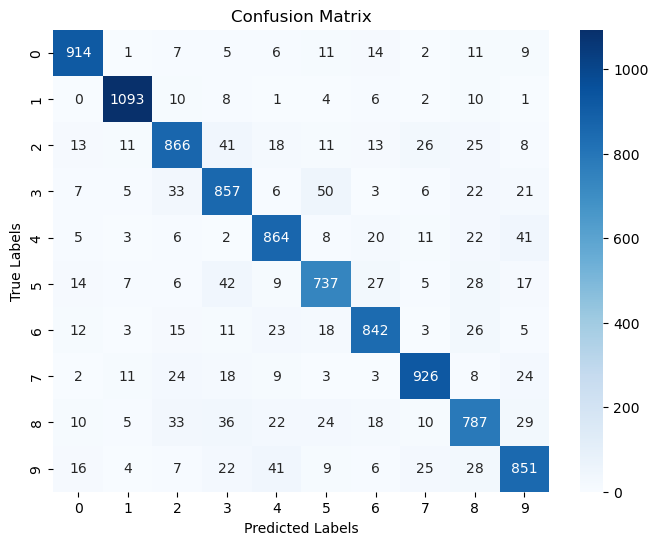


Decision Tree Classifier:
Accuracy: 0.8737
Precision: 0.8736659740763869
Recall: 0.8737
F1 Score: 0.8736255434140645


In [46]:
# Compute confusion matrix for Decision Tree Classifier
dt_cm = confusion_matrix(test_labels, dt_classifier.predict(test_images_flat))
plot_confusion_matrix(dt_cm, labels=np.unique(test_labels))
# Evaluate Decision Tree Classifier
dt_accuracy, dt_precision, dt_recall, dt_f1 = evaluate_classifier(dt_classifier, test_images_flat, test_labels)
print("\nDecision Tree Classifier:")
print("Accuracy:", dt_accuracy)
print("Precision:", dt_precision)
print("Recall:", dt_recall)
print("F1 Score:", dt_f1)

__Decision Tree Method__


Decision Tree Method is widely used in cases where there is a lot of data, such as MNIST. Like many methods, it has both advantages and disadvantages. Therefore, our task of converting handwriting into numbers can give accurate results by capturing the relationships between the data thanks to the capabilities of the method. While making this classification, it uses the decision tree structure. Thanks to the visual capabilities of the structure, the results can be interpreted and easier to understand. Thus, it is easy to understand when there is an error or problem somewhere. However, there is a high probability of overfitting problem, which is a problem that can be experienced in Neural Network, because the number of data on which the model is trained is quite high. As a result of overfitting, it causes the accuracy of the model to decrease by overreacting to an inaccuracy or unwanted data in the input data. One of the techniques used to reduce this overfitting is the pruning technique. It reduces the complexity of the model and makes it simpler. Thus, overfitting is prevented and the model classifies more accurately. Therefore, although the Decision Tree method is suitable for such tasks, it will be very useful to adjust the model according to the task and perform tests accordingly to obtain a more accurate result. 

__3 Classifier Comparison__


When logistic regression, neural network and decision tree classifier methods are evaluated in terms of metrics such as recall, precision, accuracy and F1 score, it is observed that the neural network is the most compatible model with a value of 0.97 when the maximum metric values are met. Then, logistic regression follows the neural network with a value of 0.92 and the decision tree comes last with a value of 0.87. 
In addition, when the training times were compared, the neural network method was the best with 0.033 seconds. Then, the fastest running model is the Decision Tree method with 21.2 seconds. The slowest model was Logistic Regression Classifier with 71 seconds. 
In general, the most appropriate method can be chosen according to the characteristics of the type of application, but from the observations, it can be said that the logistic regression method is more successful than the other two classifier methods due to its less computation time and high accuracy value. In second place is the neural network, which has a high accuracy but a considerably higher computation time than logistic regression. Finally, the decision tree is, according to our observations, the least effective of the three classifier methods due to its very low metric values and low computation time.
Finally, below is the ranked list of these 3 classifier methods compared in terms of training time and metric values.
Logistic Regression
Neural Network
Decision Tree
